In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder  # For CategoricalNB if needed

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Download 'IMDB Dataset.csv' from Kaggle and place in your folder
df = pd.read_csv('IMDB Dataset.csv')

print("Shape:", df.shape)  # Should be (50000, 2)
display(df.head(3))
print("\nClass distribution:")
print(df['sentiment'].value_counts(normalize=True))  # Balanced: 0.5 positive, 0.5 negative

# Sample reviews
print("\nSample positive:", df[df['sentiment'] == 'positive']['review'].iloc[0][:200])
print("Sample negative:", df[df['sentiment'] == 'negative']['review'].iloc[0][:200])

Shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive



Class distribution:
sentiment
positive    0.5
negative    0.5
Name: proportion, dtype: float64

Sample positive: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo
Sample negative: Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, J


In [3]:
# Encode labels: positive=1, negative=0
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])  # 1=positive, 0=negative

# Basic text cleaning (remove HTML, lowercase)
df['review'] = df['review'].str.replace('<br />', ' ').str.lower()

# Split data
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Vectorize with TF-IDF (limits vocab to 5000 words for efficiency)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF shape (train):", X_train_tfidf.shape)  # e.g., (37500, 5000)

TF-IDF shape (train): (37500, 5000)


In [4]:
# List of models
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'ComplementNB': ComplementNB(),
    'CategoricalNB': CategoricalNB()  # Note: May need dense data or binning for categorical
}

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Special handling for Gaussian/Categorical (need dense arrays)
    if name in ['GaussianNB', 'CategoricalNB']:
        X_train_dense = X_train_tfidf.toarray()  # Convert sparse to dense
        X_test_dense = X_test_tfidf.toarray()
        model.fit(X_train_dense, y_train)
        y_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc, 'F1-Score': f1})
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Results table
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print("\nComparison:")
display(results_df)


Training GaussianNB...
GaussianNB Accuracy: 0.8014
              precision    recall  f1-score   support

    Negative       0.80      0.81      0.80      6250
    Positive       0.80      0.80      0.80      6250

    accuracy                           0.80     12500
   macro avg       0.80      0.80      0.80     12500
weighted avg       0.80      0.80      0.80     12500


Training MultinomialNB...
MultinomialNB Accuracy: 0.8524
              precision    recall  f1-score   support

    Negative       0.86      0.84      0.85      6250
    Positive       0.85      0.86      0.85      6250

    accuracy                           0.85     12500
   macro avg       0.85      0.85      0.85     12500
weighted avg       0.85      0.85      0.85     12500


Training BernoulliNB...
BernoulliNB Accuracy: 0.8518
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85      6250
    Positive       0.85      0.85      0.85      6250

    accuracy      

c:\Users\PredatorNeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PredatorNeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PredatorNeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

,Model,Accuracy,F1-Score
1,MultinomialNB,0.85240,0.853606
3,ComplementNB,0.85240,0.853606
2,BernoulliNB,0.85176,0.852032
0,GaussianNB,0.80144,0.800643
4,CategoricalNB,0.50000,0.000000


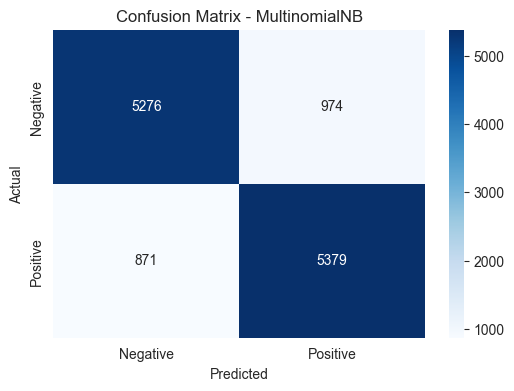


Top words for Positive:
ponyo            2.432128
matthau          2.179227
felix            2.153494
wonderfully      2.029141
unforgettable    2.021567
superb           1.887515
garfield         1.857502
flawless         1.816786
timeless         1.809313
captures         1.786836
dtype: float64

Top words for Negative:
waste       -2.938407
stinker     -2.675143
boll        -2.672752
uwe         -2.592943
worst       -2.529340
awful       -2.503200
redeeming   -2.460427
mst3k       -2.410246
unfunny     -2.363317
seagal      -2.349086
dtype: float64


In [5]:
# Pick the best model (highest accuracy)
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

# Predict again for confusion matrix
if best_model_name in ['GaussianNB', 'CategoricalNB']:
    y_pred_best = best_model.predict(X_test_tfidf.toarray())
else:
    y_pred_best = best_model.predict(X_test_tfidf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# Feature importance (for Multinomial-like: log probabilities)
if best_model_name in ['MultinomialNB', 'ComplementNB', 'BernoulliNB']:
    feature_log_prob = best_model.feature_log_prob_[1] - best_model.feature_log_prob_[0]  # Positive vs Negative
    features = vectorizer.get_feature_names_out()
    top_positive = pd.Series(feature_log_prob, index=features).sort_values(ascending=False)[:10]
    top_negative = pd.Series(feature_log_prob, index=features).sort_values()[:10]
    
    print("\nTop words for Positive:")
    print(top_positive)
    print("\nTop words for Negative:")
    print(top_negative)

In [15]:
# သင့်ရဲ့ vectorizer နဲ့ model က အဆင်သင့်ဖြစ်နေပြီဆိုရင်

custom_texts = [
    "i love apple",
    "This was the worst flight ever. Delayed, rude staff, terrible food.",
    "It was okay, nothing special.",
    "It's okay I guess... nothing special but not terrible either.",
    "Wow, what a masterpiece... said no one ever.",
    "The plot was predictable but the visuals were nice.",
    "Not bad for the price, but I expected more."
]

# Transform လုပ်တယ် (list အနေနဲ့ ထည့်ရတယ်)
custom_vec = vectorizer.transform(custom_texts)

# Predict လုပ်တယ်
predictions = best_model.predict(custom_vec)

# ရလဒ်ပြတယ်
for text, pred in zip(custom_texts, predictions):
    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Text: {text}")
    print(f"→ Prediction: {sentiment} ({pred})\n")

Text: i love apple
→ Prediction: Positive (1)

Text: This was the worst flight ever. Delayed, rude staff, terrible food.
→ Prediction: Negative (0)

Text: It was okay, nothing special.
→ Prediction: Negative (0)

Text: It's okay I guess... nothing special but not terrible either.
→ Prediction: Negative (0)

Text: Wow, what a masterpiece... said no one ever.
→ Prediction: Positive (1)

Text: The plot was predictable but the visuals were nice.
→ Prediction: Negative (0)

Text: Not bad for the price, but I expected more.
→ Prediction: Negative (0)

